Body Fat


Today's increase in food consumption affects human body fat. Effect of that 
some body part of people measurement change. So, hospitals are trying to 
make a new survey about human body fat. The result of the survey is that 
they collect information about their body fat and other body specifications. 
Now they want to see the relation of this data with body fat

CSV file : surveyofbodyfat

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

EDA

In [31]:
data=pd.read_csv("/content/surveyofbodyfat.csv")

In [32]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [33]:
data.isnull()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [35]:
data.shape

(252, 15)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Visualization

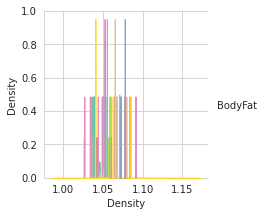

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(data[["BodyFat","Density"]],
             hue="BodyFat", height=3, palette="Set2")

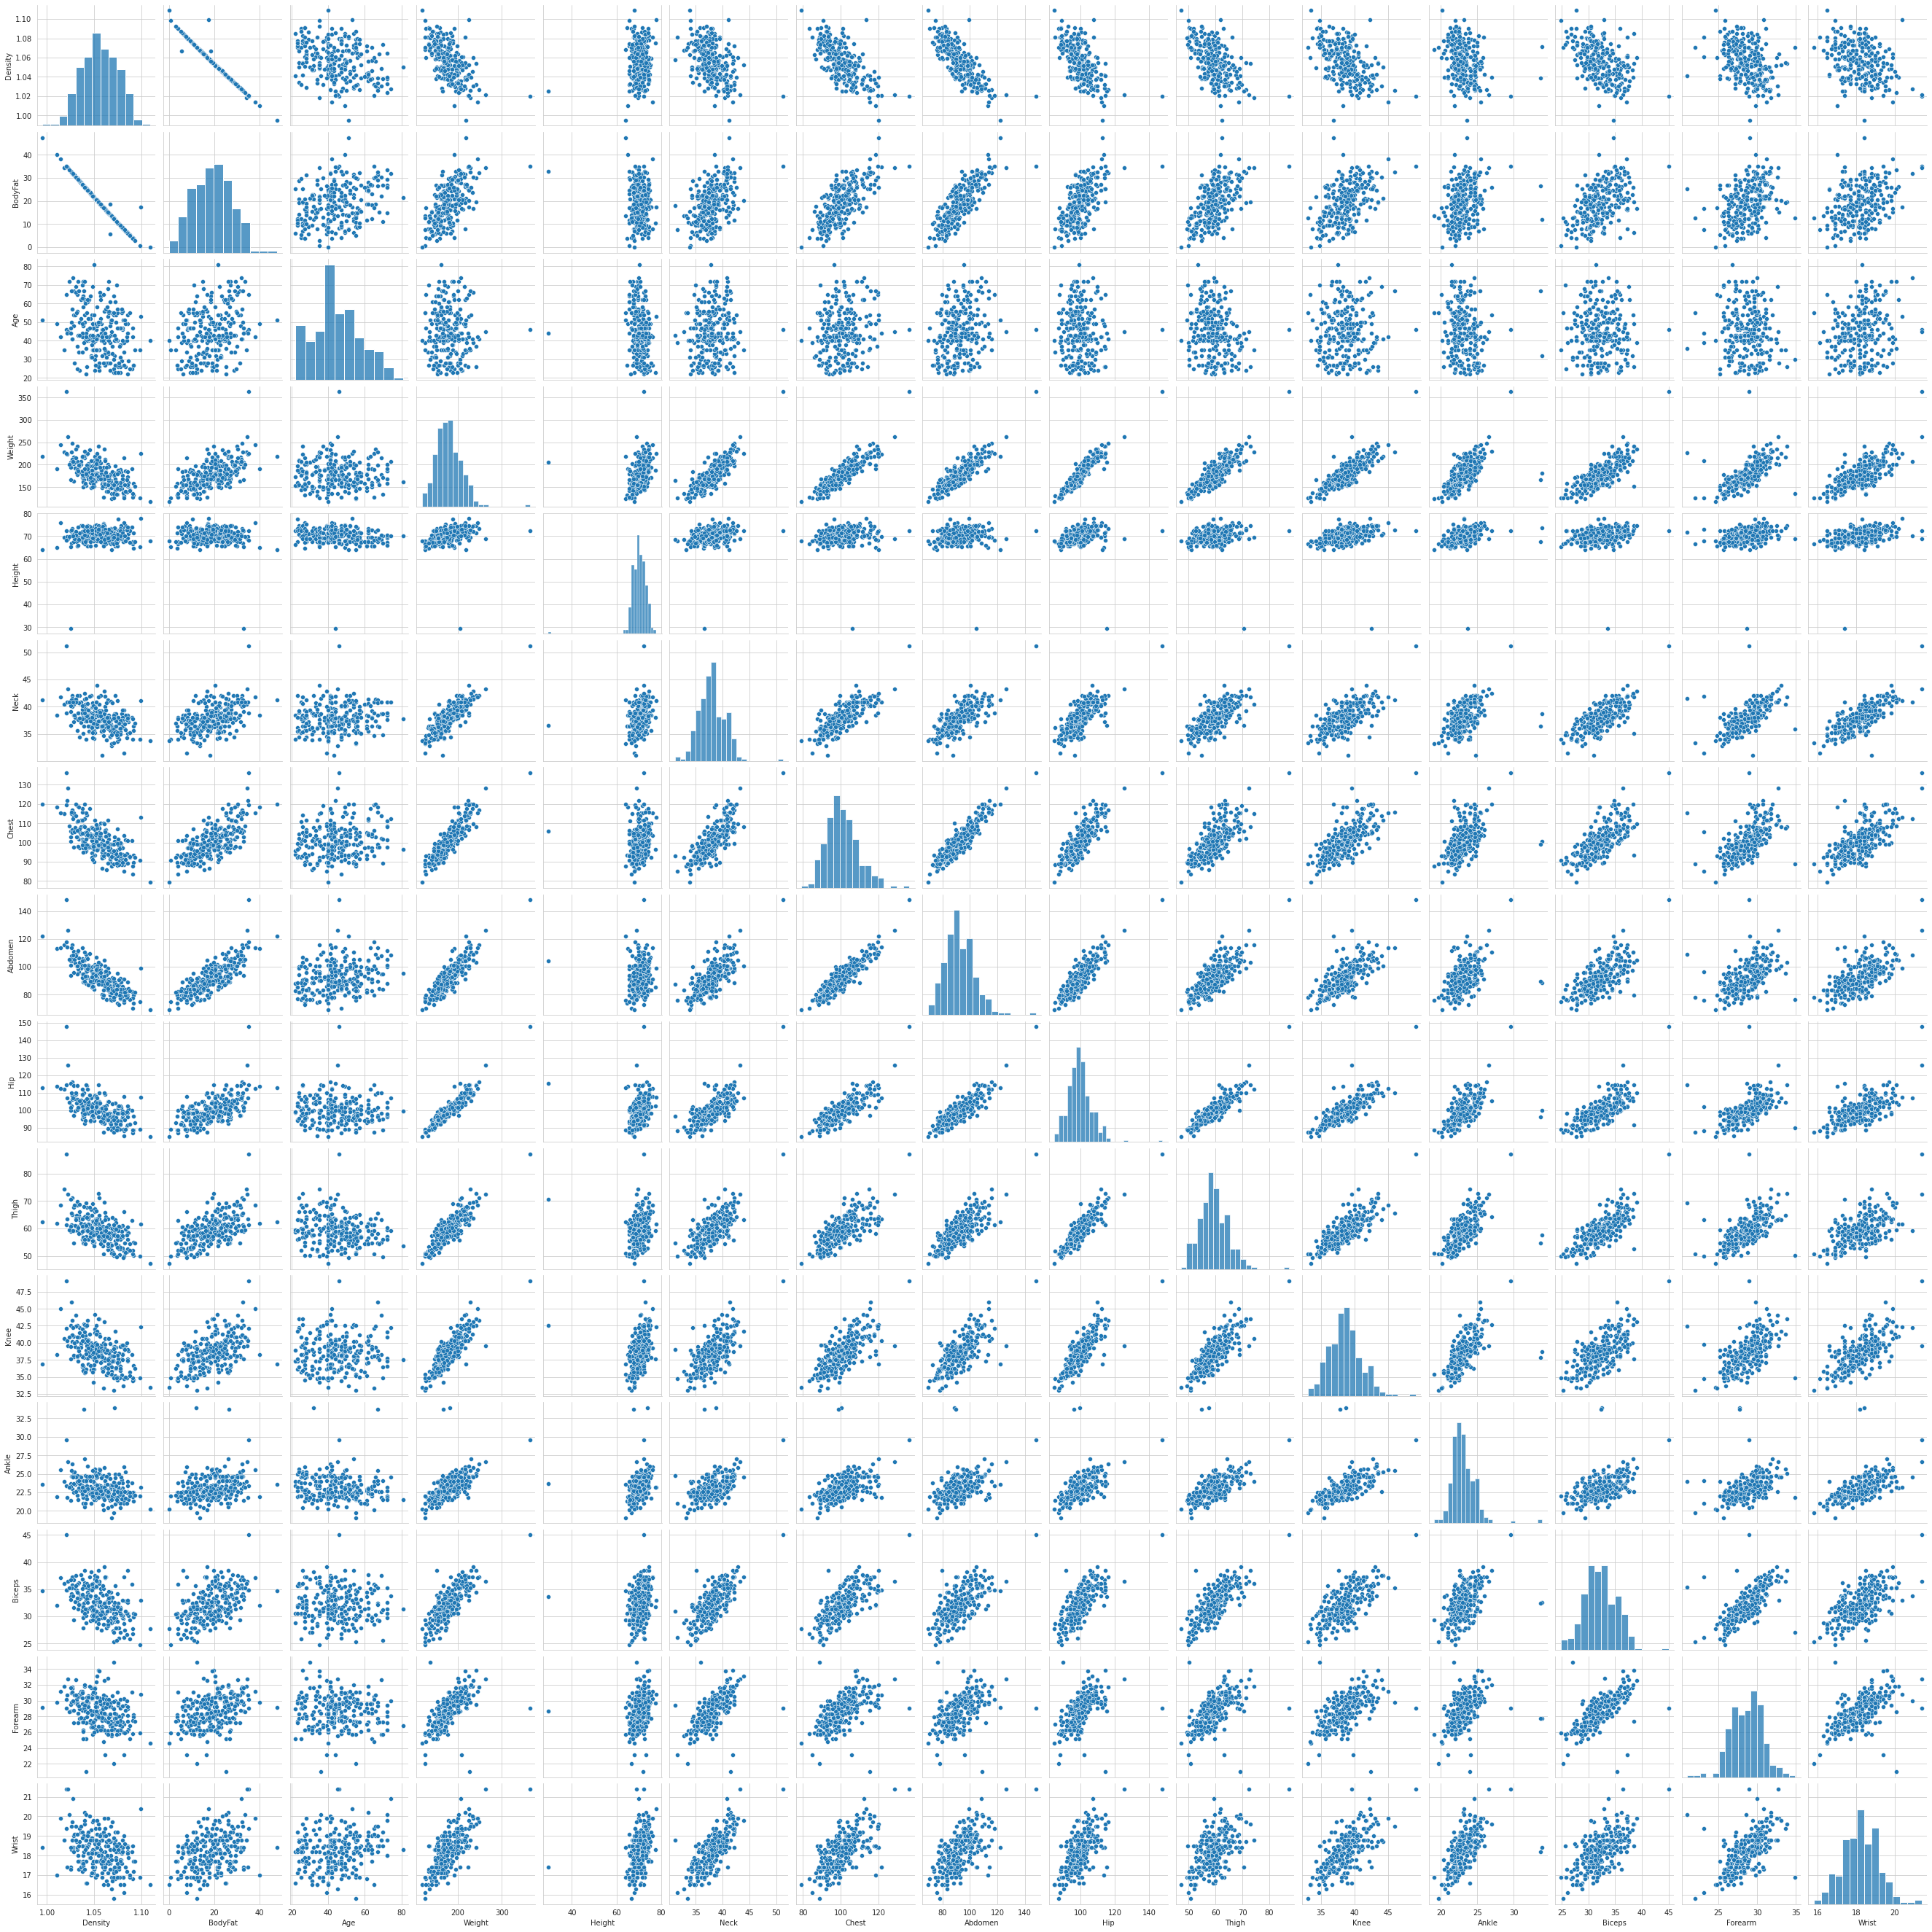

In [38]:
sns.pairplot(data)

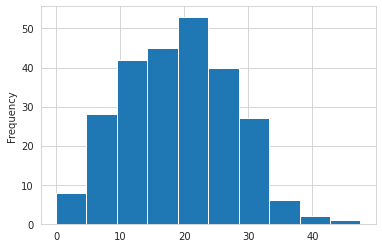

In [40]:
data["BodyFat"].plot.hist()

Correlation

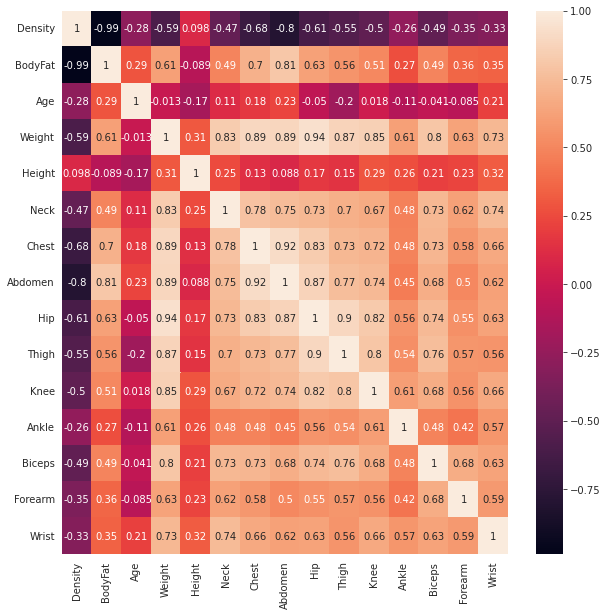

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot= True, ax = ax)

Model Building

In [43]:
X = data.drop("BodyFat", axis=1)
y = data['BodyFat']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train.shape, y_train.shape

((176, 14), (176,))

Linear Regression

In [51]:
lr=LinearRegression()

lr.fit(X_train,y_train)

lr.score(X_test, y_test).round(3)

0.988

In [53]:
y_pred=lr.predict(X_test)
y_pred

array([19.51563997, 19.28212759, 27.66077173, 20.45651287, 16.65980637,
       12.2450399 , 22.40555243, 19.42640425, 11.73942255, 11.25012444,
       26.8654095 , 24.68786169, 15.41786638, 21.95956443,  6.61999543,
        5.32991956, 21.05938748, 20.5873366 , 20.63570447, 13.19950075,
       15.46092872, 17.37823806, 14.38553916, 13.69285394, 21.79508811,
       31.16753172, 24.47643944, 15.46029722,  7.31559154, 13.40090497,
       24.6781104 , 10.64694132, 17.65822752, 19.3371586 , 19.29641744,
        3.94286852, 21.28333533, 15.98215054, 17.19165666, 11.61212939,
       14.07005015, 24.03430413, 30.10000937,  9.07731378, 13.81109299,
       21.95264073, 28.07360333, 20.93601028, 23.1247754 ,  9.95189573,
       37.85165606, 21.12359246, 23.40011158, 35.08185776, 13.63537424,
       28.68116049, 10.68769335, 12.65760313, 25.18904402, 30.12327172,
        3.48904383, 26.37871838, 11.63227143, 12.05314605, 19.69602855,
       11.74365603, 12.62057523,  6.91791167, 21.61183474, 13.35

In [54]:
from sklearn.metrics import mean_squared_error

rms=mean_squared_error(y_test,y_pred,squared=False)
rms

0.7910134010563564

In [55]:
rmse = mean_squared_error(y_test, y_pred, squared= True)
rmse

0.6257022006507441

In [56]:
data = X_train[:1]

lr.predict(data)

array([29.45727339])

In [57]:
y_train[:1]

239    29.9
Name: BodyFat, dtype: float64

Lasso

In [59]:
lasso_regr = Lasso(alpha=0.5)
lasso_regr.fit(X_train, y_train)
cv_score = cross_val_score(lasso_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
y_pred = lasso_regr.predict(X_test)
print(f"Score --> {lasso_regr.score(X_test, y_test)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

log = {"name": "lasso", "score": np.mean(cv_score), "rmse": rmse}

CV Score --> 0.713646523869372
Score --> 0.5806716264023462
RMSE --> 4.658883401067045


Ridge

In [61]:
ridge_regr = Ridge(alpha=0.5)
ridge_regr.fit(X_train, y_train)
cv_score = cross_val_score(ridge_regr, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
y_pred = ridge_regr.predict(X_test)
print(f"Score --> {ridge_regr.score(X_test, y_test)}")
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE --> {rmse}")

log = {"name": "ridge", "score": np.mean(cv_score), "rmse": rmse}

CV Score --> 0.7089409507989041
Score --> 0.63681747930788
RMSE --> 4.33577948192536
